In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import datetime
import re

import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2

In [2]:
file = open('review.json', 'r')

In [3]:
stop = 5376719
all_data = []
for i, line in enumerate(file):
    if i%stop==0:
        print(i)
    if i==stop:
        break
    
    data = json.loads(line)
    
    stars = data["stars"]
    useful = data["useful"]
    funny = data["funny"]
    cool = data["cool"]
    text = data["text"]
    date = data["date"]
    
    all_data.append([stars
                    , useful
                    , funny
                    , cool
                    , text
                    , date])
    
df_short = pd.DataFrame(all_data, columns = ["stars"
                                            , "useful"
                                            , "funny"
                                            , "cool"
                                            , "text"
                                            , "date"])

file.close()

0
5376719


In [4]:
pd.to_datetime(df_short.date)

0         2013-05-07 04:34:36
1         2017-01-14 21:30:33
2         2016-11-09 20:09:03
3         2018-01-09 20:56:38
4         2018-01-30 23:07:38
                  ...        
5376714   2012-05-30 16:21:38
5376715   2018-02-02 20:29:21
5376716   2018-06-09 21:13:57
5376717   2016-02-12 22:50:11
5376718   2017-04-08 19:51:33
Name: date, Length: 5376719, dtype: datetime64[ns]

In [5]:
df_short.dtypes

stars     float64
useful      int64
funny       int64
cool        int64
text       object
date       object
dtype: object

In [6]:
df_short['year'] = pd.DatetimeIndex(df_short.date).year

In [7]:
df_short['month'] = pd.DatetimeIndex(df_short.date).month

In [8]:
df_short['week'] = pd.DatetimeIndex(df_short.date).weekofyear

In [9]:
df_short['day_of_month'] = pd.DatetimeIndex(df_short.date).day

In [10]:
df_short['day_of_year'] = pd.DatetimeIndex(df_short.date).dayofyear

In [11]:
df_short['weekday'] = pd.DatetimeIndex(df_short.date).weekday

In [12]:
df_short['hour'] = pd.DatetimeIndex(df_short.date).hour

In [13]:
df_short['minute'] = pd.DatetimeIndex(df_short.date).minute

In [14]:
df_short['text_length'] = df_short.text.apply(len)

In [15]:
df_short['word_count'] = df_short.text.apply(lambda x: len(x.split()))

In [16]:
df_short.head()

,stars,useful,funny,cool,text,date,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
0,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,2013,5,19,7,127,1,4,34,204,39
1,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,2017,1,2,14,14,5,21,30,1561,274
2,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,2016,11,45,9,314,2,20,9,615,109
3,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,2018,1,2,9,9,1,20,56,407,68
4,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,2018,1,5,30,30,1,23,7,3509,673


In [17]:
df_short.dtypes

stars           float64
useful            int64
funny             int64
cool              int64
text             object
date             object
year              int64
month             int64
week              int64
day_of_month      int64
day_of_year       int64
weekday           int64
hour              int64
minute            int64
text_length       int64
word_count        int64
dtype: object

In [18]:
df_short.describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06
mean,3.719286e+00,1.356029e+00,4.843331e-01,5.790738e-01,2.015134e+03,6.450306e+00,2.625337e+01,1.573724e+01,1.808767e+02,3.014933e+00,1.236490e+01,2.959230e+01,6.017980e+02,1.113910e+02
std,1.462404e+00,3.787361e+00,2.473184e+00,2.365143e+00,2.452266e+00,3.319725e+00,1.449097e+01,8.807471e+00,1.013879e+02,2.033551e+00,8.085663e+00,1.731283e+01,5.675211e+02,1.054375e+02
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,4.000000e+00,1.400000e+01,8.000000e+00,9.500000e+01,1.000000e+00,4.000000e+00,1.500000e+01,2.370000e+02,4.300000e+01
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,7.000000e+00,2.700000e+01,1.600000e+01,1.830000e+02,3.000000e+00,1.500000e+01,3.000000e+01,4.240000e+02,7.900000e+01
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.017000e+03,9.000000e+00,3.800000e+01,2.300000e+01,2.650000e+02,5.000000e+00,2.000000e+01,4.500000e+01,7.640000e+02,1.420000e+02
max,5.000000e+00,1.241000e+03,1.290000e+03,5.060000e+02,2.018000e+03,1.200000e+01,5.300000e+01,3.100000e+01,3.660000e+02,6.000000e+00,2.300000e+01,5.900000e+01,5.000000e+03,1.052000e+03


In [19]:
ztest, pval = stests.ztest(df_short.useful, df_short.funny, value=0, alternative='two-sided')

In [20]:
print(pval)
print(ztest)

0.0
446.85148897130534


In [21]:
ztest, pval = stests.ztest(df_short.useful, df_short.cool, value=0, alternative='two-sided')

In [22]:
print(pval)
print(ztest)

0.0
403.47262673314845


In [23]:
ztest, pval = stests.ztest(df_short.funny, df_short.cool, value=0, alternative='two-sided')

In [24]:
print(pval)
print(ztest)

0.0
-64.19581180825962


In [25]:
ztest, pval = stests.ztest(df_short.stars, df_short.useful, value=0, alternative='two-sided')

In [26]:
print(pval)
print(ztest)

0.0
1349.7552745733967


In [27]:
ztest, pval = stests.ztest(df_short.stars, df_short.funny, value=0, alternative='two-sided')

In [28]:
print(pval)
print(ztest)

0.0
2610.7251112554254


In [29]:
ztest, pval = stests.ztest(df_short.stars, df_short.cool, value=0, alternative='two-sided')

In [30]:
print(pval)
print(ztest)

0.0
2618.5265722378595


In [31]:
ztest, pval = stests.ztest(df_short.stars, df_short.word_count, value=0, alternative='two-sided')

In [32]:
print(pval)
print(ztest)

0.0
-2367.683679377583


In [33]:
df_short.describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06,5.376719e+06
mean,3.719286e+00,1.356029e+00,4.843331e-01,5.790738e-01,2.015134e+03,6.450306e+00,2.625337e+01,1.573724e+01,1.808767e+02,3.014933e+00,1.236490e+01,2.959230e+01,6.017980e+02,1.113910e+02
std,1.462404e+00,3.787361e+00,2.473184e+00,2.365143e+00,2.452266e+00,3.319725e+00,1.449097e+01,8.807471e+00,1.013879e+02,2.033551e+00,8.085663e+00,1.731283e+01,5.675211e+02,1.054375e+02
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,4.000000e+00,1.400000e+01,8.000000e+00,9.500000e+01,1.000000e+00,4.000000e+00,1.500000e+01,2.370000e+02,4.300000e+01
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,7.000000e+00,2.700000e+01,1.600000e+01,1.830000e+02,3.000000e+00,1.500000e+01,3.000000e+01,4.240000e+02,7.900000e+01
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.017000e+03,9.000000e+00,3.800000e+01,2.300000e+01,2.650000e+02,5.000000e+00,2.000000e+01,4.500000e+01,7.640000e+02,1.420000e+02
max,5.000000e+00,1.241000e+03,1.290000e+03,5.060000e+02,2.018000e+03,1.200000e+01,5.300000e+01,3.100000e+01,3.660000e+02,6.000000e+00,2.300000e+01,5.900000e+01,5.000000e+03,1.052000e+03


In [34]:
corr = df_short.loc[:, 'stars':'cool'].corr()

In [35]:
corr.style.background_gradient(cmap='coolwarm')

,stars,useful,funny,cool
stars,1,-0.0887402,-0.0448506,0.0461035
useful,-0.0887402,1,0.602617,0.727797
funny,-0.0448506,0.602617,1,0.672157
cool,0.0461035,0.727797,0.672157,1


In [36]:
corr = df_short.loc[:, ('stars', 'year', 'month', 'week', 'day_of_month', 'day_of_year', 'weekday', 'hour', 'minute')].corr()

In [37]:
corr.style.background_gradient(cmap='coolwarm')

,stars,year,month,week,day_of_month,day_of_year,weekday,hour,minute
stars,1,0.0225211,-0.00539682,-0.00538026,-0.000246568,-0.00539571,-0.0017662,0.00570988,0.00019789
year,0.0225211,1,-0.0789681,-0.0776941,-0.0113799,-0.0801505,0.050808,0.00231341,-0.00130529
month,-0.00539682,-0.0789681,1,0.97139,-0.00537591,0.996213,-0.00430049,0.00635031,-0.000795192
week,-0.00538026,-0.0776941,0.97139,1,0.0572612,0.973183,-0.00781476,0.00666248,-0.000683268
day_of_month,-0.000246568,-0.0113799,-0.00537591,0.0572612,1,0.0812889,-0.00401652,0.00111275,0.000338217
day_of_year,-0.00539571,-0.0801505,0.996213,0.973183,0.0812889,1,-0.00461399,0.00637425,-0.000765237
weekday,-0.0017662,0.050808,-0.00430049,-0.00781476,-0.00401652,-0.00461399,1,-0.000570428,-0.00122937
hour,0.00570988,0.00231341,0.00635031,0.00666248,0.00111275,0.00637425,-0.000570428,1,0.0176758
minute,0.00019789,-0.00130529,-0.000795192,-0.000683268,0.000338217,-0.000765237,-0.00122937,0.0176758,1


In [38]:
corr = df_short.loc[:, ('stars', 'useful', 'funny', 'cool', 'word_count')].corr()

In [39]:
corr.style.background_gradient(cmap='coolwarm')

,stars,useful,funny,cool,word_count
stars,1,-0.0887402,-0.0448506,0.0461035,-0.204582
useful,-0.0887402,1,0.602617,0.727797,0.252836
funny,-0.0448506,0.602617,1,0.672157,0.164333
cool,0.0461035,0.727797,0.672157,1,0.179001
word_count,-0.204582,0.252836,0.164333,0.179001,1


In [40]:
x1 = df_short.useful
y1 = df_short.funny
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

x2 = df_short.useful
y2 = df_short.cool
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)

x3 = df_short.funny
y3 = df_short.cool
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)

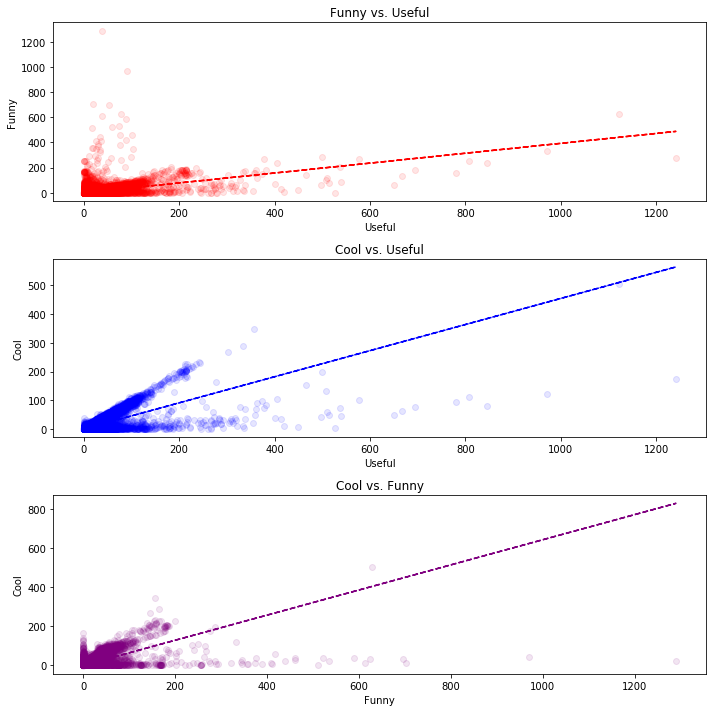

In [41]:
fig, ax = plt.subplots(3,1, figsize=(10,10), tight_layout=True)

ax[0].scatter(df_short.useful, df_short.funny, color='red', alpha=0.1)
ax[0].set_xlabel('Useful')
ax[0].set_ylabel('Funny')
ax[0].set_title('Funny vs. Useful')
ax[0].plot(x1,p1(x1), color='red', linestyle="dashed")

ax[1].scatter(df_short.useful, df_short.cool, color='blue', alpha=0.1)
ax[1].set_xlabel('Useful')
ax[1].set_ylabel('Cool')
ax[1].set_title('Cool vs. Useful')
ax[1].plot(x2,p2(x2), color='blue', linestyle="dashed")

ax[2].scatter(df_short.funny, df_short.cool, color='purple', alpha=0.1)
ax[2].set_xlabel('Funny')
ax[2].set_ylabel('Cool')
ax[2].set_title('Cool vs. Funny')
ax[2].plot(x3,p3(x3),color = 'purple', linestyle="dashed");

In [42]:
corr = df_short.loc[:, ('stars', 'useful', 'funny', 'cool', 'year', 'month', 'week', 'day_of_month', 'day_of_year', 'weekday', 'hour', 'minute', 'text_length', 'word_count')].corr()

In [43]:
corr.style.background_gradient(cmap='coolwarm')

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
stars,1,-0.0887402,-0.0448506,0.0461035,0.0225211,-0.00539682,-0.00538026,-0.000246568,-0.00539571,-0.0017662,0.00570988,0.00019789,-0.194521,-0.204582
useful,-0.0887402,1,0.602617,0.727797,-0.109035,-0.0103739,-0.0100532,-0.00183417,-0.0104194,-0.0236057,0.00444386,-0.000718769,0.256558,0.252836
funny,-0.0448506,0.602617,1,0.672157,-0.0809932,-0.00434246,-0.003918,-0.00125827,-0.00438059,-0.0160771,-0.00293653,-0.00103421,0.167898,0.164333
cool,0.0461035,0.727797,0.672157,1,-0.0682639,-0.00486962,-0.00444771,-0.0020093,-0.00496142,-0.0206069,-0.00305689,-0.000455102,0.185048,0.179001
year,0.0225211,-0.109035,-0.0809932,-0.0682639,1,-0.0789681,-0.0776941,-0.0113799,-0.0801505,0.050808,0.00231341,-0.00130529,-0.140552,-0.137655
month,-0.00539682,-0.0103739,-0.00434246,-0.00486962,-0.0789681,1,0.97139,-0.00537591,0.996213,-0.00430049,0.00635031,-0.000795192,-0.00569376,-0.00585607
week,-0.00538026,-0.0100532,-0.003918,-0.00444771,-0.0776941,0.97139,1,0.0572612,0.973183,-0.00781476,0.00666248,-0.000683268,-0.0051891,-0.00535194
day_of_month,-0.000246568,-0.00183417,-0.00125827,-0.0020093,-0.0113799,-0.00537591,0.0572612,1,0.0812889,-0.00401652,0.00111275,0.000338217,-0.000125155,-6.903e-05
day_of_year,-0.00539571,-0.0104194,-0.00438059,-0.00496142,-0.0801505,0.996213,0.973183,0.0812889,1,-0.00461399,0.00637425,-0.000765237,-0.00561146,-0.00577234
weekday,-0.0017662,-0.0236057,-0.0160771,-0.0206069,0.050808,-0.00430049,-0.00781476,-0.00401652,-0.00461399,1,-0.000570428,-0.00122937,-0.0370253,-0.0374092


In [44]:
df_stars = df_short.groupby('stars')

In [45]:
df_stars.get_group(1.0).describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,803341.0,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000,803341.000000
mean,1.0,2.067613,0.620339,0.245740,2015.578119,6.525830,26.579531,15.742533,183.171496,3.054034,12.356446,29.559120,759.642476,143.013426
std,0.0,5.749875,2.286491,1.299188,2.140903,3.292359,14.377305,8.820875,100.582768,2.041697,8.141812,17.313969,710.116757,134.099700
min,1.0,0.000000,0.000000,0.000000,2005.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0,0.000000,0.000000,0.000000,2014.000000,4.000000,14.000000,8.000000,98.000000,1.000000,4.000000,15.000000,299.000000,56.000000
50%,1.0,1.000000,0.000000,0.000000,2016.000000,7.000000,27.000000,16.000000,186.000000,3.000000,15.000000,30.000000,541.000000,102.000000
75%,1.0,2.000000,1.000000,0.000000,2017.000000,9.000000,38.000000,23.000000,266.000000,5.000000,20.000000,45.000000,961.000000,181.000000
max,1.0,1122.000000,628.000000,506.000000,2018.000000,12.000000,53.000000,31.000000,366.000000,6.000000,23.000000,59.000000,5000.000000,1052.000000


In [46]:
df_stars.get_group(2.0).describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,434089.0,434089.000000,434089.000000,434089.000000,434089.000000,434089.000000,434089.00000,434089.000000,434089.000000,434089.000000,434089.000000,434089.000000,434089.000000,434089.000000
mean,2.0,1.587283,0.624003,0.401360,2014.856725,6.441741,26.21397,15.746434,180.628489,3.029091,12.229934,29.628240,761.414205,142.029089
std,0.0,4.266775,2.046135,1.731115,2.507706,3.325496,14.52472,8.814865,101.636403,2.070485,8.043509,17.327473,656.862753,122.518037
min,2.0,0.000000,0.000000,0.000000,2005.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.0,0.000000,0.000000,0.000000,2013.000000,4.000000,14.00000,8.000000,94.000000,1.000000,4.000000,15.000000,321.000000,60.000000
50%,2.0,1.000000,0.000000,0.000000,2015.000000,7.000000,27.00000,16.000000,183.000000,3.000000,15.000000,30.000000,570.000000,106.000000
75%,2.0,2.000000,1.000000,0.000000,2017.000000,9.000000,38.00000,23.000000,265.000000,5.000000,19.000000,45.000000,981.000000,183.000000
max,2.0,1241.000000,277.000000,190.000000,2018.000000,12.000000,53.00000,31.000000,366.000000,6.000000,23.000000,59.000000,5000.000000,1023.000000


In [47]:
df_stars.get_group(3.0).describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,593581.0,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000,593581.000000
mean,3.0,1.377721,0.611440,0.674600,2014.512948,6.418516,26.123055,15.735669,179.915996,2.969989,12.245997,29.593161,709.128901,131.657853
std,0.0,3.740648,2.614599,2.799566,2.681105,3.354319,14.648053,8.812637,102.497887,2.060101,7.987504,17.322937,600.874209,111.053667
min,3.0,0.000000,0.000000,0.000000,2004.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.0,0.000000,0.000000,0.000000,2013.000000,4.000000,14.000000,8.000000,92.000000,1.000000,4.000000,15.000000,301.000000,56.000000
50%,3.0,0.000000,0.000000,0.000000,2015.000000,6.000000,26.000000,16.000000,182.000000,3.000000,15.000000,30.000000,539.000000,101.000000
75%,3.0,2.000000,0.000000,1.000000,2017.000000,9.000000,38.000000,23.000000,265.000000,5.000000,19.000000,45.000000,923.000000,172.000000
max,3.0,808.000000,460.000000,290.000000,2018.000000,12.000000,53.000000,31.000000,366.000000,6.000000,23.000000,59.000000,5000.000000,1005.000000


In [48]:
df_stars.get_group(4.0).describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,1183247.0,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06,1.183247e+06
mean,4.0,1.380691e+00,5.708453e-01,8.594579e-01,2.014489e+03,6.405583e+00,2.605983e+01,1.572876e+01,1.795170e+02,2.962120e+00,1.234889e+01,2.961925e+01,6.233757e+02,1.148009e+02
std,0.0,3.559319e+00,2.629628e+00,3.052782e+00,2.657891e+00,3.351400e+00,1.463108e+01,8.811227e+00,1.023908e+02,2.046930e+00,7.990538e+00,1.730947e+01,5.512172e+02,1.011845e+02
min,4.0,0.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,4.0,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,4.000000e+00,1.400000e+01,8.000000e+00,9.200000e+01,1.000000e+00,4.000000e+00,1.500000e+01,2.530000e+02,4.600000e+01
50%,4.0,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03,6.000000e+00,2.600000e+01,1.600000e+01,1.810000e+02,3.000000e+00,1.500000e+01,3.000000e+01,4.590000e+02,8.500000e+01
75%,4.0,2.000000e+00,0.000000e+00,1.000000e+00,2.017000e+03,9.000000e+00,3.800000e+01,2.300000e+01,2.650000e+02,5.000000e+00,1.900000e+01,4.500000e+01,8.110000e+02,1.500000e+02
max,4.0,2.440000e+02,5.890000e+02,2.290000e+02,2.018000e+03,1.200000e+01,5.300000e+01,3.100000e+01,3.660000e+02,6.000000e+00,2.300000e+01,5.900000e+01,5.000000e+03,1.034000e+03


In [49]:
df_stars.get_group(5.0).describe()

,stars,useful,funny,cool,year,month,week,day_of_month,day_of_year,weekday,hour,minute,text_length,word_count
count,2362461.0,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06,2.362461e+06
mean,5.0,1.053766e+00,3.371552e-01,5.606429e-01,2.015513e+03,6.456586e+00,2.627938e+01,1.573840e+01,1.810643e+02,3.036778e+00,1.243046e+01,2.958328e+01,4.810207e+02,8.820844e+01
std,0.0,2.814910e+00,2.480621e+00,2.209987e+00,2.257785e+00,3.302724e+00,1.441078e+01,8.798369e+00,1.008135e+02,2.009630e+00,8.145191e+00,1.730887e+01,4.566245e+02,8.392074e+01
min,5.0,-1.000000e+00,0.000000e+00,-1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.0,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,4.000000e+00,1.400000e+01,8.000000e+00,9.600000e+01,1.000000e+00,4.000000e+00,1.500000e+01,2.000000e+02,3.600000e+01
50%,5.0,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,7.000000e+00,2.700000e+01,1.600000e+01,1.830000e+02,3.000000e+00,1.500000e+01,3.000000e+01,3.400000e+02,6.200000e+01
75%,5.0,1.000000e+00,0.000000e+00,1.000000e+00,2.017000e+03,9.000000e+00,3.800000e+01,2.300000e+01,2.650000e+02,5.000000e+00,2.000000e+01,4.500000e+01,5.930000e+02,1.090000e+02
max,5.0,3.580000e+02,1.290000e+03,3.470000e+02,2.018000e+03,1.200000e+01,5.300000e+01,3.100000e+01,3.660000e+02,6.000000e+00,2.300000e+01,5.900000e+01,5.000000e+03,1.014000e+03


In [50]:
def attribute_means(attr='useful'):
    return [df_stars.get_group(float(x))[attr].mean() for x in range(1,6)]

In [51]:
attribute_means(attr='useful')

[2.067612632742509,
 1.587282792238458,
 1.377720985004574,
 1.3806905912290501,
 1.0537663902176586]

In [52]:
useful_means_by_stars = [df_stars.get_group(float(x)).useful.mean() for x in range(1,6)]

In [53]:
useful_means_by_stars

[2.067612632742509,
 1.587282792238458,
 1.377720985004574,
 1.3806905912290501,
 1.0537663902176586]

In [54]:
stars = [x for x in range(1,6)]

In [55]:
stars

[1, 2, 3, 4, 5]

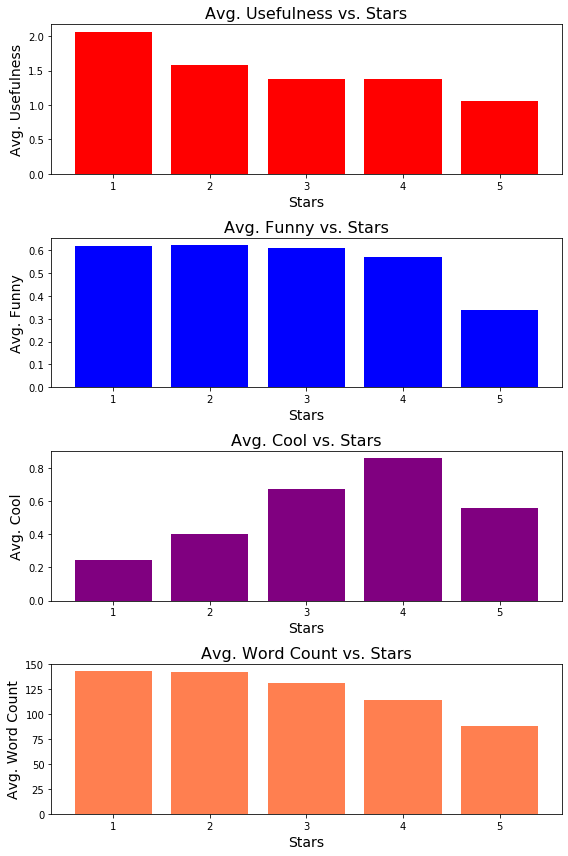

In [56]:
fig, axs = plt.subplots(4, 1, figsize=(8,12),tight_layout=True)

axs[0].bar(stars, attribute_means('useful'), color='red')
axs[0].set_xlabel('Stars', fontsize=14)
axs[0].set_ylabel("Avg. Usefulness", fontsize=14)
axs[0].set_title('Avg. Usefulness vs. Stars', fontsize=16)

axs[1].bar(stars, attribute_means('funny'), color='blue')
axs[1].set_xlabel('Stars', fontsize=14)
axs[1].set_ylabel("Avg. Funny", fontsize=14)
axs[1].set_title('Avg. Funny vs. Stars', fontsize=16)

axs[2].bar(stars, attribute_means('cool'), color='purple')
axs[2].set_xlabel('Stars', fontsize=14)
axs[2].set_ylabel("Avg. Cool", fontsize=14)
axs[2].set_title('Avg. Cool vs. Stars', fontsize=16)

axs[3].bar(stars, attribute_means('word_count'), color='coral')
axs[3].set_xlabel('Stars', fontsize=14)
axs[3].set_ylabel("Avg. Word Count", fontsize=14)
axs[3].set_title('Avg. Word Count vs. Stars', fontsize=16);

In [57]:
contingency_table = pd.crosstab(df_short.stars, df_short.useful)

In [58]:
observed_values = contingency_table.values

In [59]:
b = stats.chi2_contingency(contingency_table)

In [60]:
b

(123106.31677729418,
 0.0,
 1152,
 array([[1.49411007e-01, 4.29031764e+05, 1.71952496e+05, ...,
         1.49411007e-01, 1.49411007e-01, 1.49411007e-01],
        [8.07349240e-02, 2.31829285e+05, 9.29153213e+04, ...,
         8.07349240e-02, 8.07349240e-02, 8.07349240e-02],
        [1.10398367e-01, 3.17007477e+05, 1.27054059e+05, ...,
         1.10398367e-01, 1.10398367e-01, 1.10398367e-01],
        [2.20068596e-01, 6.31924112e+05, 2.53270125e+05, ...,
         2.20068596e-01, 2.20068596e-01, 2.20068596e-01],
        [4.39387106e-01, 1.26169436e+06, 5.05676999e+05, ...,
         4.39387106e-01, 4.39387106e-01, 4.39387106e-01]]))

In [61]:
expected_values = b[3]

In [62]:
row_len = len(contingency_table.iloc[:,0])

In [63]:
col_len = len(contingency_table.iloc[0,:])

In [64]:
dof = (row_len - 1) * (col_len - 1)

In [65]:
alpha = 0.05

In [66]:
chi_square = np.sum([(o - e) ** 2. / e for o, e in zip(observed_values, expected_values)])

In [67]:
chi_square

123106.31677729418

In [68]:
critical_value = chi2.ppf(q=1-alpha, df=dof)
critical_value

1232.0735469703454

In [69]:
p_value = 1 - chi2.cdf(x=chi_square, df=dof)
p_value

0.0

In [70]:
def chi_square_test(table1, table2, alpha=0.05):
    
    import pandas as pd
    import scipy.stats as stats
    from scipy.stats import chi2
    
    c_table = pd.crosstab(table1, table2)
    obs_val = c_table.values
    b = stats.chi2_contingency(c_table)
    exp_val = b[3]
    row_len = len(contingency_table.iloc[:,0])
    col_len = len(contingency_table.iloc[0,:])
    dof = (row_len - 1) * (col_len - 1)
    chi_square = np.sum([(o - e) ** 2. / e for o, e in zip(obs_val, exp_val)])
    critical_value = chi2.ppf(q=1-alpha, df=dof)
    p_value = 1 - chi2.cdf(x=chi_square, df=dof)
    if chi_square >= critical_value:
        result = 'Reject H0. There is A relationship between the two categorical variables'
    else:
        result = 'Cannot Reject H0. There is NO relationship between the two catgorical variables'
    return chi_square, critical_value, p_value, result

In [71]:
chi_sqaure, critical_value, p_value, result = chi_square_test(df_short.stars, df_short.useful)

In [72]:
chi_square

123106.31677729418

In [73]:
critical_value

1232.0735469703454

In [74]:
p_value

0.0

In [75]:
result

'Reject H0. There is A relationship between the two categorical variables'

In [76]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.funny)

In [77]:
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 104293.2834
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [78]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.cool)

In [79]:
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 104649.9059
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [80]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.word_count)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 335307.5698
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [81]:
css, cv, pv, re =  chi_square_test(df_short.useful, df_short.funny)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 242566186.8255
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [82]:
css, cv, pv, re =  chi_square_test(df_short.useful, df_short.cool)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 276959041.9058
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [83]:
css, cv, pv, re =  chi_square_test(df_short.funny, df_short.cool)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 197158106.8978
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [84]:
css, cv, pv, re =  chi_square_test(df_short.useful, df_short.cool)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 276959041.9058
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [85]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.year)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 217180.3043
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [86]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.month)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 2527.1253
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [87]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.week)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 3875.1551
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [88]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.day_of_month)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 314.5108
Critical Value: 1232.0735
p-value: 1.0000

Cannot Reject H0. There is NO relationship between the two catgorical variables


In [89]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.day_of_year)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 6335.8172
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [90]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.hour)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 10051.1773
Critical Value: 1232.0735
p-value: 0.0000

Reject H0. There is A relationship between the two categorical variables


In [91]:
css, cv, pv, re =  chi_square_test(df_short.stars, df_short.minute)
print('Chi Sqaure Statistics: {:2.4f}'.format(css))
print('Critical Value: {:2.4f}'.format(cv))
print('p-value: {:2.4f}'.format(pv))
print('\n'+re)

Chi Sqaure Statistics: 238.3721
Critical Value: 1232.0735
p-value: 1.0000

Cannot Reject H0. There is NO relationship between the two catgorical variables


In [92]:
df_stars.get_group(1.0).useful

0          6
4          7
7          3
11         0
14         1
          ..
5376662    1
5376679    1
5376680    4
5376687    0
5376713    0
Name: useful, Length: 803341, dtype: int64

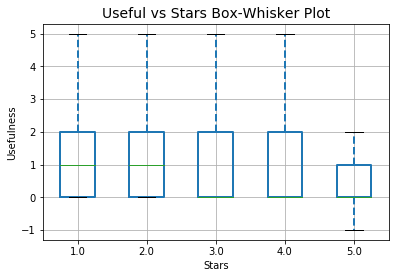

In [93]:
df_short.boxplot('useful', by='stars'
                 , boxprops= dict(linewidth=2.0, color='black')
                 , whiskerprops=dict(linestyle='--', linewidth=2.0, color='black')
                 , showfliers=False)
plt.title('Useful vs Stars Box-Whisker Plot', fontsize=14)
plt.xlabel('Stars')
plt.ylabel('Usefulness')
plt.suptitle('')
plt.show();

In [94]:
grps = pd.unique(df_short.stars.values)

In [95]:
d_data = {grp:df_short.useful[df_short.stars == grp] for grp in grps}

In [96]:
k = len(pd.unique(df_short.stars))

In [97]:
N = len(df_short.values)

In [98]:
n = df_short.groupby('stars').size()
n

stars
1.0     803341
2.0     434089
3.0     593581
4.0    1183247
5.0    2362461
dtype: int64

In [99]:
from scipy import stats

In [100]:
f, p = stats.f_oneway(d_data[1.0]
                      , d_data[2.0]
                      , d_data[3.0]
                      , d_data[4.0]
                      , d_data[5.0])

In [101]:
f, p

(11368.734153145106, 0.0)

In [102]:
def f_one_way_test(df1=df_short.stars, df2=df_short.useful):
    grps = pd.unique(df1.values)
    d_data = {grp:df2[df1 == grp] for grp in grps}
    
    from scipy import stats
    
    f, p = stats.f_oneway(d_data[1.0]
                          , d_data[2.0]
                          , d_data[3.0]
                          , d_data[4.0]
                          , d_data[5.0])
    
    if p < 0.05:
        result = 'REJECT H0. Means amonst star counts are NOT statistically equal.'
    
    else:
        result = 'DO NOT REJECT H0. Means amonst star counts ARE statistically equal'
    
    return f, p, result

In [103]:
f, p, result = f_one_way_test(df_short.stars, df_short.useful)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 11368.734153145106
p-value: 0.0

REJECT H0. Means amonst star counts are NOT statistically equal.


In [104]:
f, p, result = f_one_way_test(df_short.stars, df_short.funny)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 3809.7430610255838
p-value: 0.0

REJECT H0. Means amonst star counts are NOT statistically equal.


In [105]:
f, p, result = f_one_way_test(df_short.stars, df_short.cool)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 9098.248119383878
p-value: 0.0

REJECT H0. Means amonst star counts are NOT statistically equal.


In [106]:
f, p, result = f_one_way_test(df_short.stars, df_short.word_count)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 64528.484870888125
p-value: 0.0

REJECT H0. Means amonst star counts are NOT statistically equal.


In [107]:
f, p, result = f_one_way_test(df_short.stars, df_short.year)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 54190.104254058904
p-value: 0.0

REJECT H0. Means amonst star counts are NOT statistically equal.


In [108]:
f, p, result = f_one_way_test(df_short.stars, df_short.month)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 174.10013891605624
p-value: 2.1446262211495603e-149

REJECT H0. Means amonst star counts are NOT statistically equal.


In [109]:
f, p, result = f_one_way_test(df_short.stars, df_short.day_of_month)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 0.48007244192690945
p-value: 0.7504167976789279

DO NOT REJECT H0. Means amonst star counts ARE statistically equal


In [110]:
f, p, result = f_one_way_test(df_short.stars, df_short.day_of_year)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 172.10335872335483
p-value: 1.1495154951399721e-147

REJECT H0. Means amonst star counts are NOT statistically equal.


In [111]:
f, p, result = f_one_way_test(df_short.stars, df_short.hour)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 102.54663243434919
p-value: 1.7642293073295881e-87

REJECT H0. Means amonst star counts are NOT statistically equal.


In [112]:
f, p, result = f_one_way_test(df_short.stars, df_short.minute)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 2.0828893997080256
p-value: 0.08016077719290084

DO NOT REJECT H0. Means amonst star counts ARE statistically equal


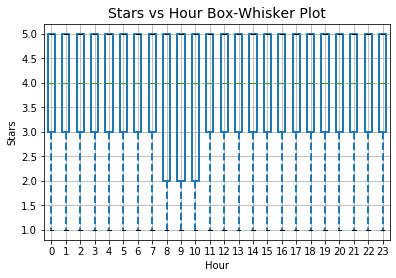

In [113]:
df_short.boxplot('stars', by='hour', boxprops= dict(linewidth=2.0, color='black')
                 , whiskerprops=dict(linestyle='--', linewidth=2.0, color='black')
                 , showfliers=False)
plt.title('Stars vs Hour Box-Whisker Plot', fontsize=14)
plt.xlabel('Hour')
plt.ylabel('Stars')
plt.suptitle('')
plt.show();

In [114]:
def f_one_way_test_hour(df1=df_short.hour, df2=df_short.stars):
    grps = pd.unique(df1.values)
    d_data = {grp:df2[df1 == grp] for grp in grps}
    
    from scipy import stats
    
    f, p = stats.f_oneway(d_data[0]
                         , d_data[1]
                         , d_data[2]
                         , d_data[3]
                         , d_data[4]
                         , d_data[5]
                         , d_data[6]
                         , d_data[7]
                         , d_data[8]
                         , d_data[9]
                         , d_data[10]
                         , d_data[11]
                         , d_data[12]
                         , d_data[13]
                         , d_data[14]
                         , d_data[15]
                         , d_data[16]
                         , d_data[17]
                         , d_data[18]
                         , d_data[19]
                         , d_data[20]
                         , d_data[21]
                         , d_data[22]
                         , d_data[23])
    
    if p < 0.05:
        result = 'REJECT H0. Means amonst hours are NOT statistically equal.'
    
    else:
        result = 'DO NOT REJECT H0. Means amonst hours ARE statistically equal'
    
    return f, p, result

In [115]:
f, p, result = f_one_way_test_hour(df1=df_short.hour, df2=df_short.stars)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 96.87286521365021
p-value: 0.0

REJECT H0. Means amonst hours are NOT statistically equal.


In [116]:
f, p, result = f_one_way_test_hour(df1=df_short.hour, df2=df_short.useful)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 180.0240580390261
p-value: 0.0

REJECT H0. Means amonst hours are NOT statistically equal.


In [117]:
f, p, result = f_one_way_test_hour(df1=df_short.hour, df2=df_short.funny)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 170.73892626560203
p-value: 0.0

REJECT H0. Means amonst hours are NOT statistically equal.


In [118]:
f, p, result = f_one_way_test_hour(df1=df_short.hour, df2=df_short.cool)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 216.28232830983737
p-value: 0.0

REJECT H0. Means amonst hours are NOT statistically equal.


In [119]:
f, p, result = f_one_way_test_hour(df1=df_short.hour, df2=df_short.word_count)
print('f statistic: {}'.format(f))
print('p-value: {}'.format(p))
print('\n'+result)

f statistic: 701.3977494695032
p-value: 0.0

REJECT H0. Means amonst hours are NOT statistically equal.


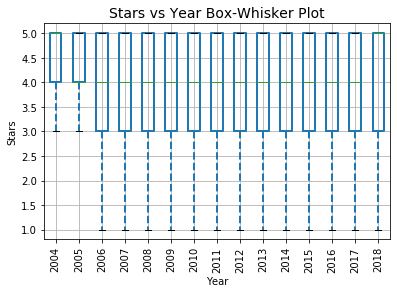

In [142]:
df_short.boxplot('stars', by='year', boxprops= dict(linewidth=2.0, color='black')
                 , whiskerprops=dict(linestyle='--', linewidth=2.0, color='black')
                 , showfliers=False)
plt.title('Stars vs Year Box-Whisker Plot', fontsize=14)
plt.xlabel('Year')
plt.xticks(np.arange(1,16), np.sort(df_short.year.unique()), rotation=90)
plt.ylabel('Stars')
plt.suptitle('')
plt.show();

In [141]:
np.sort(df_short.year.unique())

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [127]:
df_short.year.value_counts(sort=False)

2004        12
2005       734
2006      4072
2007     17011
2008     45708
2009     80816
2010    150474
2011    243684
2012    295498
2013    396524
2014    567444
2015    766185
2016    884728
2017    977114
2018    946715
Name: year, dtype: int64

In [143]:
len(np.arange(1,16))

15